# Observed Air Quality (PurpleAir)

This notebook retrieves readings from PurpleAir Sensors in Minneapolis and cleans the entries and saves the results as a csv file.

Documentation is available here: https://api.purpleair.com.
You can read this article for help getting started: https://community.purpleair.com/t/making-api-calls-with-the-purpleair-api/180.

From PurpleAir: 

"The data from individual sensors will update no less than every 30 seconds. As a courtesy, we ask that you limit the number of requests to no more than once every 1 to 10 minutes, assuming you are only using the API to obtain data from sensors. If retrieving data from multiple sensors at once, please send a single request rather than individual requests in succession.

The PurpleAir historical API is released as of July 18, 2022. For more information, view this post: https://community.purpleair.com/t/new-version-of-the-purpleair-api-on-july-18th/1251.

Please let us know if you have any questions or concerns, and have a great day!"

A paper on this process: https://doi.org/10.5194/amt-14-4617-2021 (Link for [Download](https://www.researchgate.net/publication/352663348_Development_and_application_of_a_United_States-wide_correction_for_PM25_data_collected_with_the_PurpleAir_sensor) )

Chat on which PM Estimate to use: https://community.purpleair.com/t/pm2-5-algorithms/3972/6

In [10]:
import os
import requests 
import datetime as dt
import pandas as pd
import arcpy
import numpy as np

In [2]:
cwd = os.getcwd() # This is a global variable for where the notebook is (must change if running in arcpro)

# Make it workspace

arcpy.env.workspace = os.path.join(cwd, '..', '..', 'data', 'QAQC.gdb')

arcpy.env.overwriteOutput = True # Overwrite layers is okay

mpls_8km = "mpls_8km"

In [3]:
#bound strings
bounds_strings = [f'nwlng=-93.43083707299996',
                  f'nwlat=45.12366876300007',
                  f'selng=-93.09225748799997',
                  f'selat=44.81791263300005']
bounds_string = '&'.join(bounds_strings)

print(bounds_string)

nwlng=-93.43083707299996&nwlat=45.12366876300007&selng=-93.09225748799997&selat=44.81791263300005


## Get Station IDs

In [4]:
# This function will be used to collect data for multiple public PurpleAir sensors.
def getSensorsData(query='', api_read_key=''):

    # my_url is assigned the URL we are going to send our request to.
    url = 'https://api.purpleair.com/v1/sensors?' + query
    
    print('Here is the full url for the API call:\n\n', url)

    # my_headers is assigned the context of our request we want to make. In this case
    # we will pass through our API read key using the variable created above.
    my_headers = {'X-API-Key':api_read_key}

    # This line creates and sends the request and then assigns its response to the
    # variable, r.
    response = requests.get(url, headers=my_headers)

    # We then return the response we received.
    return response

In [5]:
# This is my personal API key... Please use responsibly!
# 51592903-B445-11ED-B6F4-42010A800007

api = input('Please enter your Purple Air api key')

Please enter your Purple Air api key 51592903-B445-11ED-B6F4-42010A800007


In [6]:
# Designating and formatting the fields to request

fields = ['location_type']

fields_string = 'fields=' + '%2C'.join(fields)

print(fields_string)

fields=location_type


In [7]:
# Put it all together

query_string = '&'.join([fields_string, bounds_string])

print(query_string)

fields=location_type&nwlng=-93.43083707299996&nwlat=45.12366876300007&selng=-93.09225748799997&selat=44.81791263300005


In [8]:
# Make the request

response = getSensorsData(query_string, api)

Here is the full url for the API call:

 https://api.purpleair.com/v1/sensors?fields=location_type&nwlng=-93.43083707299996&nwlat=45.12366876300007&selng=-93.09225748799997&selat=44.81791263300005


In [11]:
# Get response into Pandas DataFrame

response_dict = response.json() # Read response as a json (dictionary)

col_names = response_dict['fields']
data = np.array(response_dict['data'])

df = pd.DataFrame(data, columns = col_names)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   sensor_index   88 non-null     int32
 1   location_type  88 non-null     int32
dtypes: int32(2)
memory usage: 832.0 bytes


In [12]:
df.head()

,sensor_index,location_type
0,3088,0
1,5582,0
2,137876,1
3,11134,0
4,142718,0


In [13]:
# Only want outside sensors

outside_sensors = df[df['location_type']==0] # 0 = outside

len(outside_sensors)

80

In [32]:
response.json()

{'api_version': 'V1.0.11-0.0.42',
 'time_stamp': 1680553668,
 'data_time_stamp': 1680553632,
 'max_age': 604800,
 'firmware_default_version': '7.02',
 'fields': ['sensor_index', 'location_type'],
 'location_types': ['outside', 'inside'],
 'data': [[3088, 0],
  [5582, 0],
  [137876, 1],
  [11134, 0],
  [142718, 0],
  [142720, 0],
  [142726, 0],
  [142730, 0],
  [142728, 0],
  [142734, 0],
  [142732, 0],
  [142736, 0],
  [142744, 0],
  [142750, 0],
  [142748, 0],
  [142752, 0],
  [142756, 0],
  [142774, 0],
  [142772, 0],
  [142852, 0],
  [143214, 0],
  [143216, 0],
  [143222, 0],
  [143226, 0],
  [143224, 0],
  [143238, 0],
  [143242, 0],
  [143240, 0],
  [143246, 0],
  [143636, 0],
  [143648, 0],
  [143656, 0],
  [143666, 0],
  [143668, 0],
  [143916, 0],
  [145202, 0],
  [145204, 0],
  [145234, 0],
  [145242, 0],
  [145250, 0],
  [145454, 0],
  [145470, 0],
  [145498, 0],
  [145506, 0],
  [145604, 0],
  [145610, 0],
  [145616, 0],
  [147749, 1],
  [17189, 1],
  [21179, 0],
  [154751, 

# Historical Data? -- The rest of this gets a little messy...

## Using API (Does Not Work)

They're restricting this API usage...

<https://community.purpleair.com/t/historical-api-endpoints-are-now-restricted/1557>

In [15]:
# Let's get their histories from the past year? 

#When I ran this on the PurpleAir API I had to swamp the start/end dates to get results

# Start time

end_datetime = dt.datetime(2022,11,10) # November 10th, 2022
end_timestamp = int(dt.datetime.timestamp(end_datetime))

# End time

start_datetime = dt.datetime(2021,11,10) # November 10th, 2021
start_timestamp = int(dt.datetime.timestamp(start_datetime))

# Sensors

sensor_ids = outside_sensors.sensor_index.apply(lambda x: int(x))
start_timestamp

1636524000

In [16]:
end_timestamp

1668060000

In [33]:
# Sensor id

sensor_id = sensor_ids[0]

# Timestamp String

time_string = 'start_timestamp=' + str(start_timestamp) + '&end_timestamp=' + str(end_timestamp)

# Average string (in minutes) 1440 is 1 day average

avg_string = 'average=1440'

# Environmental fields

env_fields = ['humidity', 'temperature', 'pressure', 'voc', 'pm2.5_alt', 'pm2.5_atm', 'pm2.5_cf_1']

env_fields_string = 'fields=' + '%2C%20'.join(env_fields)

# Base URL

base_url = f'https://api.purpleair.com/v1/sensors/{sensor_id}/history/csv?'

# Put it all together

query_url = base_url + '&'.join([time_string, avg_string, env_fields_string])

my_headers = {'X-API-Key':api}

# This line creates and sends the request and then assigns its response to the
# variable, r.
r = requests.get(query_url, headers=my_headers)

# so I used the API online and this URL worked: 

#GET https://api.purpleair.com/v1/sensors/142718/history/csv?start_timestamp=1636524000&end_timestamp=1668060000&average=1440&fields=humidity%2C%20temperature%2C%20pressure%2C%20voc%2C%20pm2.5_alt%2C%20pm2.5_atm%2C%20pm2.5_cf_1 HTTP/1.1
#X-API-Key: 51592903-B445-11ED-B6F4-42010A800007

# I am trying to re-create this but so far am unsuccesful.

In [34]:
query_url

'https://api.purpleair.com/v1/sensors/3088/history/csv?start_timestamp=1636524000&end_timestamp=1668060000&average=1440&fields=humidity%2C%20temperature%2C%20pressure%2C%20voc%2C%20pm2.5_alt%2C%20pm2.5_atm%2C%20pm2.5_cf_1'

In [42]:
# r.text

#This is where I stopped

## Downloading using their tool (takes for ever!!!)


In [41]:
# Csv names need to be parsed

import re # String findings

filenames = os.listdir('PurpleAirCSVs')


# Get coords, if outside, and if city owned

names = []
lats = []
lons = []
is_outside = []
is_city = []
is_B = []

for filename in filenames:
    # Get name
    name = filename.split('(')[0]
    names += [name]
    # Is it a B sensor?
    if name[-2:-1] == 'B':
        is_B.append('Yes')
    else:
        is_B.append('No')
    # Coordinates & If outside
    result = re.findall('\(.*?\)', filename)
    if len(result) == 2:
        is_outside += [result[0][1:-1]]
        coords = result[1][1:-1]
    elif len(result) == 3:
        is_outside += [result[1][1:-1]]
        coords = result[2][1:-1]
    lats.append(coords.split(' ')[0])
    lons.append(coords.split(' ')[1])
    # Is part of City's project
    if 'Community Air Monitoring Project'.upper() in filename.upper():
        is_city.append('Yes')
    else:
        is_city.append('No')

# See if active in past year 2022

is_active = []

for name in names:
    filepath = os.path.join('PurpleAirCSVs', filename)
    data = pd.read_csv(filepath)
    if data.size == 0:
        is_active.append('No')
    else:
        is_active.append('Yes')

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'PurpleAirCSVs'

In [5]:
# Initialize geodataframe

columns = ['filename', 'name', 'is_active', 'is_outside', 'is_city', 'is_B', 'latitude', 'longitude']

sensors = pd.DataFrame(zip(filenames, names, is_active, is_outside, is_city, is_B, lats, lons), 
                                   columns = columns)

In [6]:
sensors.info()
sensors.sample(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524 entries, 0 to 523
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   filename    524 non-null    object
 1   name        524 non-null    object
 2   is_active   524 non-null    object
 3   is_outside  524 non-null    object
 4   is_city     524 non-null    object
 5   is_B        524 non-null    object
 6   latitude    524 non-null    object
 7   longitude   524 non-null    object
dtypes: object(8)
memory usage: 32.9+ KB


,filename,name,is_active,is_outside,is_city,is_B,latitude,longitude
223,Bancroft B (undefined) (44.928125 -93.25389) S...,Bancroft B,Yes,undefined,No,Yes,44.928125,-93.25389


In [10]:
# Example date 2022-03-21 12:00:00 UTC

def make_string_datetime(string):
    # Example date 2022-03-21 12:00:00 UTC
    ''' This function converts a string in Purple Air CSV to datetime object'''
    
    d = int(string.split('-')[2][:2])
    m = int(string.split('-')[1])
    y = int(string.split('-')[0])
    h = int(string.split(' ')[1][:2])
    
    return dt.datetime(year = y,
                       month = m,
                       day = d,
                       hour = h)

array(['outside'], dtype=object)

In [11]:
# Select only sensors with enough observations (1/2 year)
# Only use the "A" sensors
# Get the average 'PM2.5_ATM_ug/m3' reading

import datetime as dt

A_sensors = sensors[sensors['is_B'] == 'No']

print(sensors[sensors['is_B'] == 'No'].is_outside.unique(), 'They are all outside')

A_filenames = A_sensors.filename

good_datasets = []
good_indices = []

for i, sensor in A_sensors.iterrows():
    path = os.path.join('PurpleAirCSVs', sensor.filename)
    data = pd.read_csv(path)
    
    if len(data) > 360: # At least half a year of observations?
        if 'PM2.5_ATM_ug/m3' in data.columns:
            good_datasets += [sensor.filename]
            good_indices += [i]
            
            data['datetimes'] = data.created_at.apply(lambda x: make_string_datetime(x))
            
            sensors.loc[i, 'Start_Date'] = min(data.datetimes)
            sensors.loc[i, 'End_Date'] = max(data.datetimes)
            sensors.loc[i, 'Observations'] = len(data)

['outside'] They are all outside


In [12]:
sensors_for_interpolation = sensors.iloc[good_indices]

In [13]:
max(sensors_for_interpolation.Start_Date)

Timestamp('2022-07-14 12:00:00')

In [14]:
# So we will use this as our baseline for determining average

max_start = max(sensors_for_interpolation.Start_Date)

for i, sensor in sensors_for_interpolation.iterrows():
    
    # Load Data
    path = os.path.join('PurpleAirCSVs', sensor.filename)
    data = pd.read_csv(path)
    
    # Only use observations after max_start
    data['datetimes'] = data.created_at.apply(lambda x: make_string_datetime(x))
    select_data = data[data.datetimes >= max_start]
    sensors_for_interpolation.loc[i, 'Avg_pm2.5'] = select_data['PM2.5_ATM_ug/m3'].mean()

In [15]:
len(sensors_for_interpolation)

71

In [16]:
sensors_for_interpolation.head()

,filename,name,is_active,is_outside,is_city,is_B,latitude,longitude,Start_Date,End_Date,Observations,Avg_pm2.5
6,Lee Circle (outside) (44.9073 -93.60277) Prima...,Lee Circle,Yes,outside,No,No,44.9073,-93.60277,2021-11-13 00:00:00,2022-10-25 12:00:00,1112.0,0.237451
14,MPCA_Blaine (outside) (45.1407 -93.222) Primar...,MPCA_Blaine,Yes,outside,No,No,45.1407,-93.222,2021-11-13 00:00:00,2022-10-25 12:00:00,1021.0,6.903046
44,City of Minneapolis Community Air Monitoring P...,City of Minneapolis Community Air Monitoring P...,Yes,outside,Yes,No,44.908063,-93.231281,2022-03-21 12:00:00,2022-10-25 12:00:00,592.0,7.299420
48,Edina MN (outside) (44.878832 -93.354406) Prim...,Edina MN,Yes,outside,No,No,44.878832,-93.354406,2021-11-13 00:00:00,2022-10-25 12:00:00,1124.0,7.468068
49,Cityscape (outside) (44.940389 -93.351256) Pri...,Cityscape,Yes,outside,No,No,44.940389,-93.351256,2021-11-13 00:00:00,2022-10-25 12:00:00,1146.0,8.594396


In [18]:
# What the? Where is the average so high??

highest_index = sensors_for_interpolation['Avg_pm2.5'].argmax()

sensor = sensors_for_interpolation.iloc[highest_index]

sensor

filename        Hamline Midway (outside) (44.966744 -93.179843...
name                                              Hamline Midway 
is_active                                                     Yes
is_outside                                                outside
is_city                                                        No
is_B                                                           No
latitude                                                44.966744
longitude                                              -93.179843
Start_Date                                    2021-11-13 00:00:00
End_Date                                      2022-10-25 12:00:00
Observations                                               1146.0
Avg_pm2.5                                             1989.410628
geometry                             POINT (-93.179843 44.966744)
Name: 110, dtype: object

In [19]:
# Load that data
path = os.path.join('PurpleAirCSVs', sensor.filename)

data = pd.read_csv(path)

data['datetimes'] = data.created_at.apply(lambda x: make_string_datetime(x))

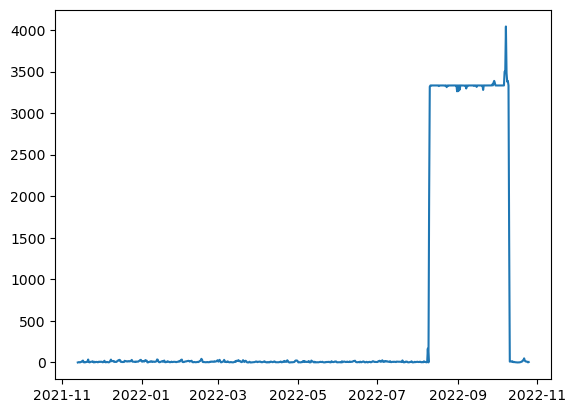

In [20]:
plt.plot(data.datetimes,data['PM2.5_ATM_ug/m3'])

In [21]:
# Whoa! I wonder what that's all about?
# Probably can't use this one...

In [22]:
good_indices = list(sensors_for_interpolation.index)
good_indices.pop(highest_index)

sensors_for_interpolation = sensors_for_interpolation.loc[good_indices]

In [23]:
# Let's try that again

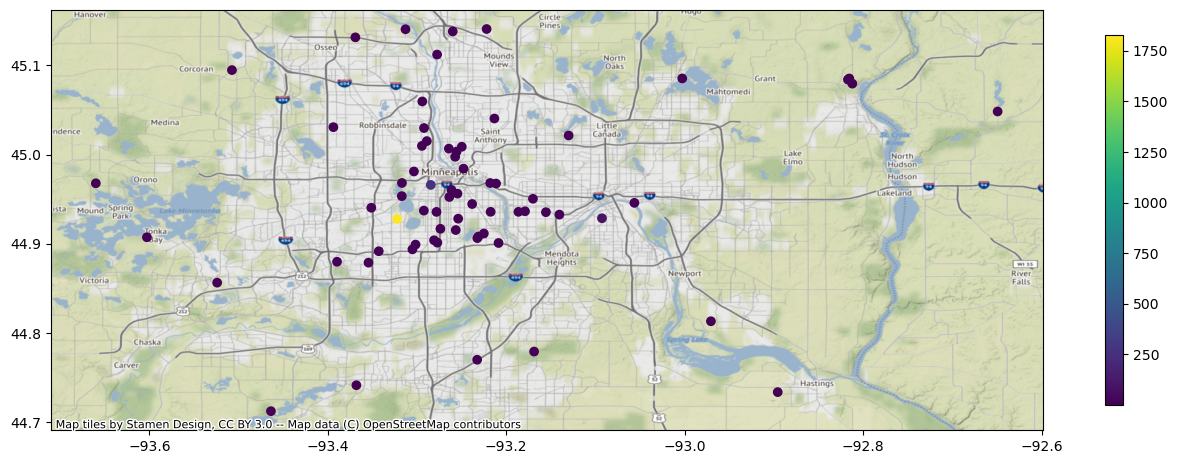

In [24]:
# Look at it spatially

geom = gpd.points_from_xy(sensors_for_interpolation.longitude, 
                          sensors_for_interpolation.latitude,
                          crs = 'EPSG:4326')

gdf = gpd.GeoDataFrame(sensors_for_interpolation, geometry = geom)

art = gdf.plot('Avg_pm2.5', legend = True, figsize = (16,16),
              legend_kwds={'shrink': 0.3})

contextily.add_basemap(ax = art,
                       crs = gdf.crs)

In [25]:
# What the? Where is the average so high??

highest_index = sensors_for_interpolation['Avg_pm2.5'].argmax()

sensor = sensors_for_interpolation.iloc[highest_index]

sensor

filename        Linden Hills (outside) (44.927761 -93.322353) ...
name                                                Linden Hills 
is_active                                                     Yes
is_outside                                                outside
is_city                                                        No
is_B                                                           No
latitude                                                44.927761
longitude                                              -93.322353
Start_Date                                    2021-11-13 00:00:00
End_Date                                      2022-10-25 12:00:00
Observations                                               1146.0
Avg_pm2.5                                             1827.039903
geometry                             POINT (-93.322353 44.927761)
Name: 492, dtype: object

In [26]:
# Load that data
path = os.path.join('PurpleAirCSVs', sensor.filename)

data = pd.read_csv(path)

data['datetimes'] = data.created_at.apply(lambda x: make_string_datetime(x))

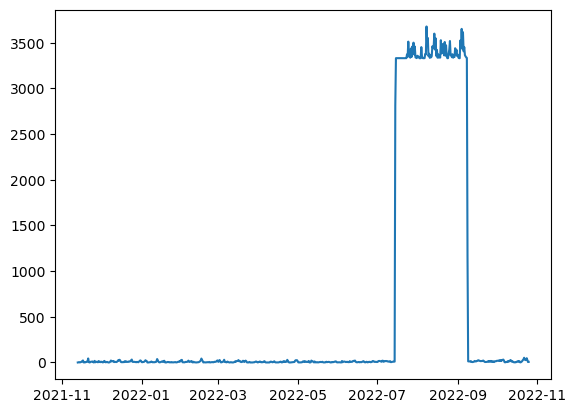

In [27]:
plt.plot(data.datetimes,data['PM2.5_ATM_ug/m3'])

In [28]:
# Whoa! I wonder what that's all about?
# Probably can't use this one either...

In [29]:
good_indices = list(sensors_for_interpolation.index)
good_indices.pop(highest_index)

sensors_for_interpolation = sensors_for_interpolation.loc[good_indices]

In [30]:
# Let's try that again

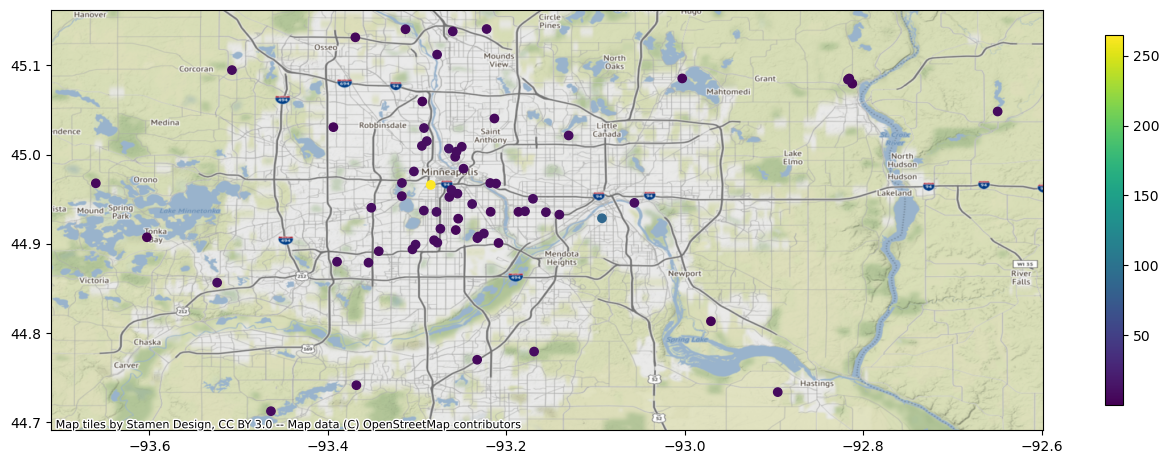

In [31]:
# Look at it spatially

geom = gpd.points_from_xy(sensors_for_interpolation.longitude, 
                          sensors_for_interpolation.latitude,
                          crs = 'EPSG:4326')

gdf = gpd.GeoDataFrame(sensors_for_interpolation, geometry = geom)

art = gdf.plot('Avg_pm2.5', legend = True, figsize = (16,16),
              legend_kwds={'shrink': 0.3})

contextily.add_basemap(ax = art,
                       crs = gdf.crs)

In [32]:
# What the? Where is the average so high??

highest_index = sensors_for_interpolation['Avg_pm2.5'].argmax()

sensor = sensors_for_interpolation.iloc[highest_index]

sensor

filename        Mpls-Loring Park (outside) (44.965964 -93.2846...
name                                            Mpls-Loring Park 
is_active                                                     Yes
is_outside                                                outside
is_city                                                        No
is_B                                                           No
latitude                                                44.965964
longitude                                              -93.284616
Start_Date                                    2021-11-13 00:00:00
End_Date                                      2022-11-08 12:00:00
Observations                                               1083.0
Avg_pm2.5                                              264.533675
geometry                             POINT (-93.284616 44.965964)
Name: 203, dtype: object

In [33]:
# Load that data
path = os.path.join('PurpleAirCSVs', sensor.filename)

data = pd.read_csv(path)

data['datetimes'] = data.created_at.apply(lambda x: make_string_datetime(x))

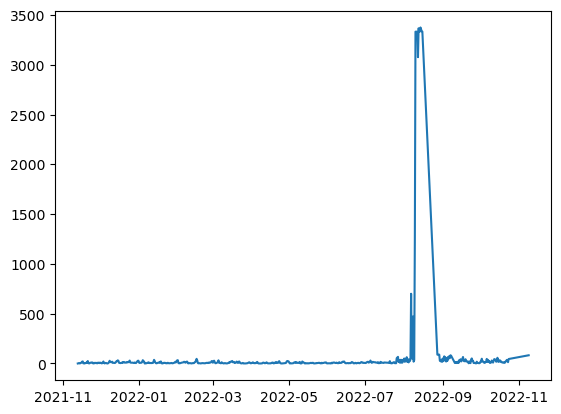

In [34]:
plt.plot(data.datetimes,data['PM2.5_ATM_ug/m3'])

In [35]:
# Whoa! I wonder what that's all about?
# Probably can't use this one either...

In [36]:
good_indices = list(sensors_for_interpolation.index)
good_indices.pop(highest_index)

sensors_for_interpolation = sensors_for_interpolation.loc[good_indices]

In [37]:
# Let's try that again

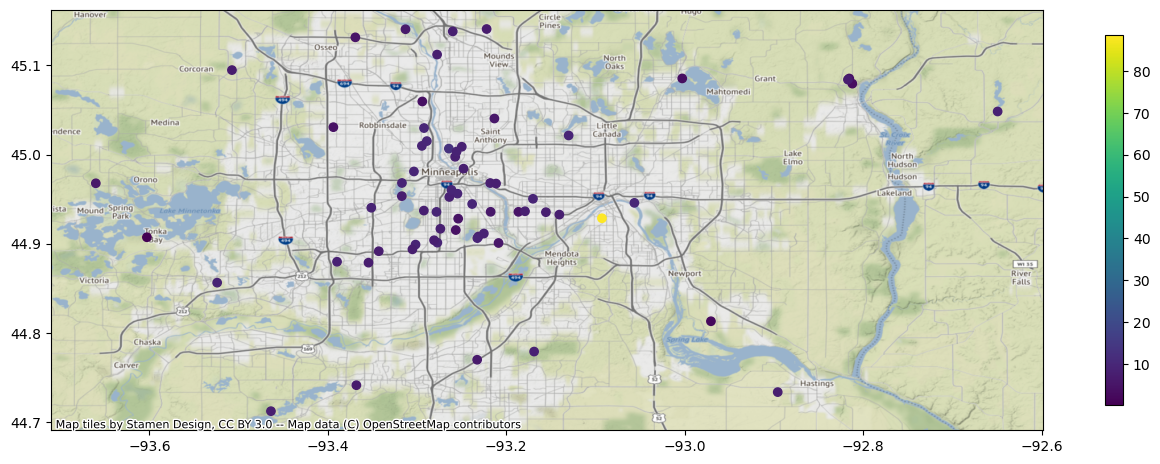

In [38]:
# Look at it spatially

geom = gpd.points_from_xy(sensors_for_interpolation.longitude, 
                          sensors_for_interpolation.latitude,
                          crs = 'EPSG:4326')

gdf = gpd.GeoDataFrame(sensors_for_interpolation, geometry = geom)

art = gdf.plot('Avg_pm2.5', legend = True, figsize = (16,16),
              legend_kwds={'shrink': 0.3})

contextily.add_basemap(ax = art,
                       crs = gdf.crs)

In [39]:
# What the? Where is the average so high??

highest_index = sensors_for_interpolation['Avg_pm2.5'].argmax()

sensor = sensors_for_interpolation.iloc[highest_index]

sensor

filename        Saint Paul West Side (outside) (44.928602 -93....
name                                        Saint Paul West Side 
is_active                                                     Yes
is_outside                                                outside
is_city                                                        No
is_B                                                           No
latitude                                                44.928602
longitude                                               -93.09272
Start_Date                                    2022-07-14 12:00:00
End_Date                                      2022-10-25 12:00:00
Observations                                                396.0
Avg_pm2.5                                               88.552071
geometry                              POINT (-93.09272 44.928602)
Name: 91, dtype: object

In [40]:
# Load that data
path = os.path.join('PurpleAirCSVs', sensor.filename)

data = pd.read_csv(path)

data['datetimes'] = data.created_at.apply(lambda x: make_string_datetime(x))

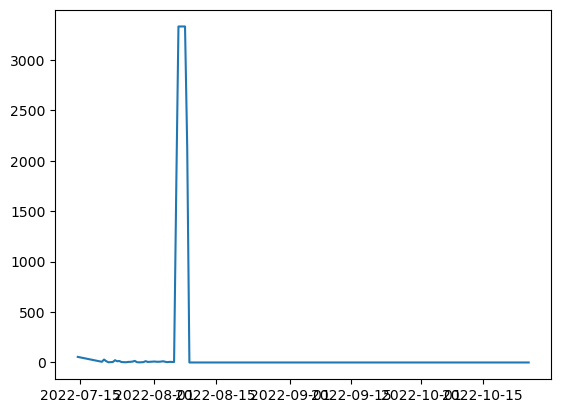

In [41]:
plt.plot(data.datetimes,data['PM2.5_ATM_ug/m3'])

In [42]:
# Whoa! I wonder what that's all about?
# Probably can't use this one...

In [43]:
good_indices = list(sensors_for_interpolation.index)
good_indices.pop(highest_index)

sensors_for_interpolation = sensors_for_interpolation.loc[good_indices]

In [44]:
# Let's try that again

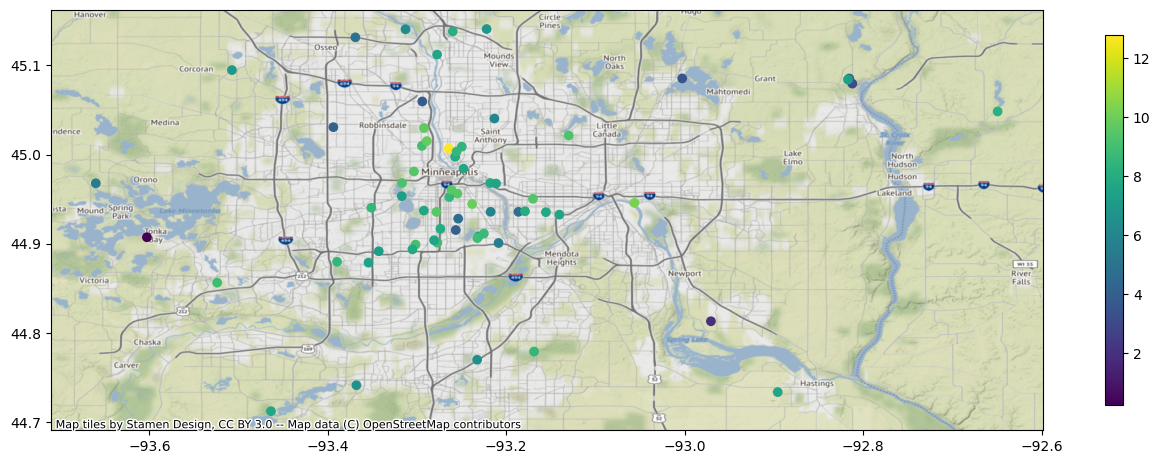

In [45]:
# Look at it spatially

geom = gpd.points_from_xy(sensors_for_interpolation.longitude, 
                          sensors_for_interpolation.latitude,
                          crs = 'EPSG:4326')

gdf = gpd.GeoDataFrame(sensors_for_interpolation, geometry = geom)

art = gdf.plot('Avg_pm2.5', legend = True, figsize = (16,16),
              legend_kwds={'shrink': 0.3})

contextily.add_basemap(ax = art,
                       crs = gdf.crs)

In [48]:
# That's more like it!

gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 67 entries, 6 to 518
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   filename      67 non-null     object        
 1   name          67 non-null     object        
 2   is_active     67 non-null     object        
 3   is_outside    67 non-null     object        
 4   is_city       67 non-null     object        
 5   is_B          67 non-null     object        
 6   latitude      67 non-null     object        
 7   longitude     67 non-null     object        
 8   Start_Date    67 non-null     datetime64[ns]
 9   End_Date      67 non-null     datetime64[ns]
 10  Observations  67 non-null     float64       
 11  Avg_pm2.5     65 non-null     float64       
 12  geometry      67 non-null     geometry      
dtypes: datetime64[ns](2), float64(2), geometry(1), object(8)
memory usage: 7.3+ KB


In [77]:
# That's more like it!

# Save it

utm_gdf = gdf.to_crs('EPSG:26915')

utm_gdf['EASTING'] = utm_gdf.geometry.x
utm_gdf['NORTHING'] = utm_gdf.geometry.y

path = os.path.join('Data', 'pm25_avg.csv')
utm_gdf.reset_index().to_csv(path, index = False)